<h1><p style="text-align: center;"> Home Credit Default Risk - FDS project 2019/2020 </p></h1>

## Team members:
 * Simone Marretta
 * Luca Scofano
 * Daniele Trappolini

------


# Introduction

### Description of the work

We are given 7 different datasets with multiple features each. The **main goal** is to predict whether a new individual will be able to repay the loan or not. We tackled different steps to achieve our goal:  <br>

 * Importing all the datasets <br><br>
 
 * Quick analysis of the main datasets<br><br>
 
 * Feature Engineering<br><br>
 
 * Cross- validation model<br><br>
 
 * Light GBM model and ROC-AUC score

### Datasets:

<h4><font color=red><li>Application trainset</font></h4>
<h4><font color=red><li>Bureau</font></h4>
<h4><font color=red><li>Bureau Balance</font></h4>
<h4><font color=red><li>Previous Application</font></h4>
<h4><font color=red><li>POS cash</font></h4>
<h4><font color=red><li>Installment payments</font></h4>
<h4><font color=red><li>Credit cards balance</font></h4>

------


# 1. Importing packages

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For the classification and the score
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

------


# 2. Importing Data

### Application (Training/Test) Dataset

In [2]:
train = pd.read_csv(r'application_train.csv')
test = pd.read_csv(r'application_test.csv')
print('Training data shape: {}, Testing data shape: {}'.format( train.shape,test.shape))

Training data shape: (307511, 122), Testing data shape: (48744, 121)


### Bureau Dataset

In [3]:
bureau = pd.read_csv(r'bureau.csv')
bureau_balance = pd.read_csv(r'bureau_balance.csv')

### Previous Application Dataset

In [4]:
previous_app = pd.read_csv(r'previous_application.csv')

### POS cash balance Dataset

In [5]:
pos = pd.read_csv(r'POS_CASH_balance.csv')

### Installment Payments Dataset

In [6]:
installments_payments = pd.read_csv(r'installments_payments.csv')

### Credit Card Dataset

In [7]:
cc = pd.read_csv(r'credit_card_balance.csv')

------


# 3. Data Analysis

We decide to gradually merge the datasets into one, we'll call it ---> **df**

In [8]:
df = train.copy()
df = df.append(test)

In [9]:
pd.set_option('display.max_columns', None)
df.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
count,356219.000000,3.562550e+05,3.559770e+05,3.562550e+05,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,176307.000000,176307.000000,176307.000000,148671.000000,148671.000000,148671.000000,356255.000000,356253.000000,107895.000000,107895.000000,107895.000000,356255.000000,356255.000000,356255.000000,356254.000000,356255.000000,355205.000000,355205.000000,167175.000000,167175.000000,167175.000000,177848.000000,177848.000000,177848.000000,162345.000000,3.555870e+05,286622.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.00000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,179914.000000,179914.000000,179914.000000,115147.000000,115147.000000,115147.000000,356255.000000,145411.000000,145411.000000,145411.000000,356255.000000,356255.000000,113276.000000,113276.000000,113276.000000,178353.000000,178353.000000,178353.000000,109394.000000,109394.000000,109394.000000,160489.000000,160489.000000,160489.000000,355205.000000,355205.000000,121014.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,307511.000000,185200.000000,183392.000000,183392.000000,183392.000000,119949.000000,119949.000000,119949.000000
mean,27425.560657,5.877674e+05,5.280200e+05,1.701161e+05,0.006281,0.005808,0.231697,0.304399,0.029995,1.911564,0.118138,0.118549,0.114914,0.088673,0.088178,0.087750,0.414316,2.151858,0.045045,0.044994,0.042930,-16041.248841,64317.231413,-3002.071163,-978.580852,-4983.593527,0.143452,0.100198,0.079819,0.078930,0.075346,0.150015,0.149494,0.145471,0.501965,5.148900e-01,0.509350,0.998170,0.000020,0.003537,0.000006,0.003043,0.002535,0.001044,0.008570,0.00023,0.007231,0.000514,0.000036,0.000438,0.000289,0.720504,0.000084,0.015065,0.087976,0.000171,0.082346,0.003977,0.071213,0.818498,0.999994,0.27

We can see there are some anamolies in  `DAYS_EMPLOYED` where the maximum values is equal to 365243.<br>
This could mean that there is an outlier in the dataset. <br>
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.<br>


365243 days is almost 1000 years, which can't be the case in our situation<br>
We decide to replace these values with NaN since we don't have the actual data.

In [10]:
df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

### Let's check if other datasets have the issue: Previous Application

In [11]:
previous_app[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].describe()

,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729
min,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


The previous application dataset has outliers, as we've seen previously. <br>
We decide to replace them with NaN since we don't have the actual data. 

In [12]:
previous_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)

previous_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)

previous_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)

previous_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)

previous_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

### Target Distribution

Target = 1 **-->** Loan was repaid <br>
Target = 0 **-->** Loan was not repaid

In [13]:
s = df.groupby(['TARGET'])['TARGET'].count()
s # shows the number of loans that weren't repaid ( = 0 ) and the ones that were repaid ( = 1)

TARGET
0.0    282686
1.0     24825
Name: TARGET, dtype: int64

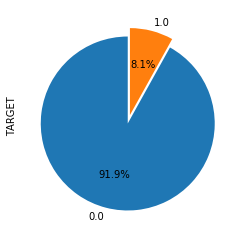

In [14]:
s.plot.pie(y=df.index,
           shadow=False,
           explode=(0.1,0),
           startangle=90,
           autopct='%1.1f%%')

We can clearly see that most of the targets = 0, labels are unbalanced.

### Types of occupations

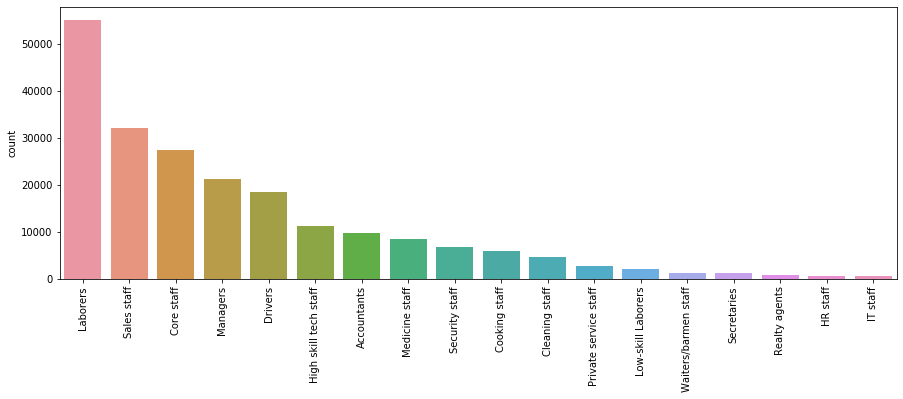

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(train.OCCUPATION_TYPE.values, order = train.OCCUPATION_TYPE.value_counts().index, data=train)
plt.xticks(rotation=90)
plt.show()

Laborers are the ones that ask for the most loans, followed by sales staff and core staff.

### Types of credit

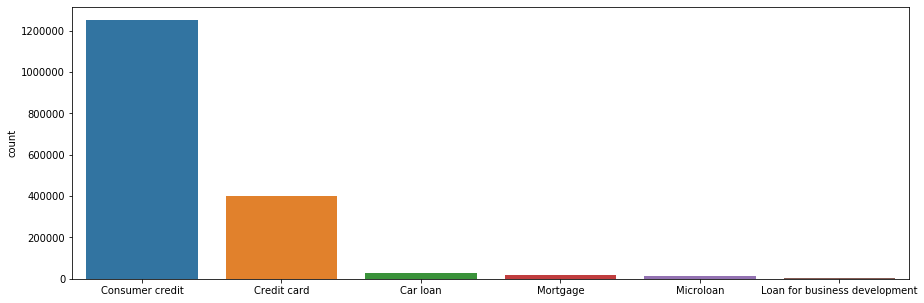

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(bureau.CREDIT_TYPE.values, order = bureau.CREDIT_TYPE.value_counts().iloc[:6].index, data=bureau)

### Education

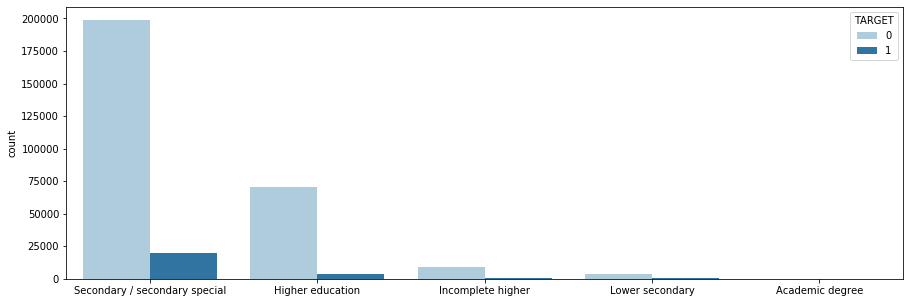

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(train.NAME_EDUCATION_TYPE.values, data=train, hue=train.TARGET, palette = "Paired")
plt.show()

People who have secondary school education are the ones that are more likely not to repay the loan.

### Missing values

In [18]:
missing = df.isnull().sum(axis=0).reset_index()
missing.columns=['column_name','missing_count']
percent = ((df.isnull().sum(axis=0)/df.shape[0])*100).reset_index()
percent.columns=['variable','percent']
missing_data = pd.concat([missing,percent['percent']],axis=1)
missing_data=missing_data.ix[missing_data['missing_count']>0].sort_values(by='missing_count')

In [19]:
missing_data

,column_name,missing_count,percent
25,DAYS_LAST_PHONE_CHANGE,1,0.000281
17,CNT_FAM_MEMBERS,2,0.000561
0,AMT_ANNUITY,36,0.010105
2,AMT_GOODS_PRICE,278,0.078034
37,EXT_SOURCE_2,668,0.187506
...,...,...,...
95,NONLIVINGAPARTMENTS_MODE,246861,69.293343
94,NONLIVINGAPARTMENTS_MEDI,246861,69.293343
20,COMMONAREA_MEDI,248360,69.714109
19,COMMONAREA_AVG,248360,69.714109


We are going to delete all the values with more than 50 percent of missing values

This is the part of code to remove the feautures that have more than 50% of missing values.
We won't use it because the final score would decrease since EXT_SOURCE_1 would be deleted.

------


# 4. Pre-processing and feature engineering 

#### Handling Categorical Features

In [19]:
def one_hot_encoding(df):
    
    categorical = [col for col in list(df.columns) if df[col].dtype == 'object'] # returns all the columns that are categorical
    for col in categorical:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1) # creates dummy variables of categorical features that we previously found
    return df 
    

## 4.1 Train/Test

### Label Encoder and One Hot Encoding

Since we have categorical data we need to convert this kind of categorical text data into model-understandable numerical data, for this porpuse we use the **Label Encoder class**. eg:<br>
  * Small --> 0 <br>
  * Medium --> 1<br>
  * Large --> 2<br>

**One Hot Encoding** : The example that we provided previously is enough to understand that integer encoding is useful in a situation where the categorical data can be ordered in some wat, but in many cases categorical variables don't have such ordinal relationship, the integer encoding is not enough. One hot encoding is a process by which categorical variables are converted into a binary style of categorizing. eg: <br>

| Fruit   | 
| --------|
| Banana  |
| Mango   |
| Apple   | 
 
<br><br> **Becomes:** <br>

|  Banana  |  Mango  |  Apple  |
| --- |:-:| -:|
| 0   | 0 | 1 |
| 0   | 1 | 0 |
| 1   | 0 | 0 |

In [20]:
# Label encoder
label_enc = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in df:
    
    if df[col].dtype == 'object':
        
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            label_enc.fit(df[col])
            df[col] = label_enc.transform(df[col])
            le_count += 1
            
print ('{} variable/s are label encoded'.format(le_count))

3 variable/s are label encoded


In [21]:
# One Hot Encoding 
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
print ('The shape of dataset after One hot encoding: {}'.format(df.shape))

The shape of dataset after One hot encoding: (356255, 256)


### Feature Engineering - Train and Test

In [22]:
# Column to represent Days Employed percent in his/her life
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

# Column to represent Credit Income Percent
df['CREDIT_INCOME_PERCENT'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# Column to represent Income per person based on the numerosity of the family
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']

# Column to represent Annuity Income percent
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# Column to represent Credit Term
df['CREDIT_TERM'] = df['AMT_CREDIT'] / df['AMT_ANNUITY'] 

## 4.2 Bureau and Bureau_balance

### One Hot Encoding

In [23]:
bureau = one_hot_encoding(bureau)
bureau_balance = one_hot_encoding(bureau_balance)

### Feature Engineering - Bureau and Bureau_balance

In [24]:
# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]

# Merge datasets into one single dataframe --> df
df = df.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

## 4.3 Previous Application

### One Hot Encoding

In [25]:
previous_app = one_hot_encoding(previous_app)

### Feature Engineering - Previous Application

In [26]:
# Average values for all other features in previous applications
prev_apps_avg = previous_app.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]

# Merge datasets into one single dataframe --> df
df = df.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

## 4.4 POS Cash Balance

### One Hot Encoding

In [27]:
pos = one_hot_encoding(pos)

### Feature Engineering - POS Cash Balance

In [28]:
# Count the number of pos cash for a given ID
pos_count = pos[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos['SK_ID_PREV'] = pos['SK_ID_CURR'].map(pos_count['SK_ID_PREV'])

# Average Values for all other variables in pos cash
pos_avg = pos.groupby('SK_ID_CURR').mean()

# Merge datasets into one single dataframe --> df
df = df.merge(right=pos_avg.reset_index(), how='left', on='SK_ID_CURR')

## 4.5 Installment Payments

### One Hot Encoding

In [29]:
installments_payments = one_hot_encoding(installments_payments)

### Feature Engineering - Installment Payments

In [30]:
# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['PAYMENT_PERC'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['PAYMENT_DIFF'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_payments['DPD'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['DBD'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']

# count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['SK_ID_PREV'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

# Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]

# Merge datasets into one single dataframe --> df
df = df.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

## 4.6 Exploration of Credit Card

### One Hot Encoding

In [31]:
cc = one_hot_encoding(cc)

### Feature Engineering - Credit Card

In [32]:
# count the number of previous applications for a given ID
nb_prevs = cc[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
cc['SK_ID_PREV'] = cc['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

# average of all other columns 
avg_cc_bal = cc.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]

# Merge datasets into one single dataframe --> df
df = df.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

------


# 5. LightGBM

To understand and set-up the LightGMB algorithm we used this article: <br> https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc <br> (as well as other material on the internet)

### Why did we use LightGBM?

 * It is a gradient boosting framework that uses **tree based learning algorithm**.
 * It' an algorithm that uses gradient boosting framework and it's a tree based learning algorithm. It grows tree vertically while other algorithm grows trees horizontally.
 * It can handle the **large size of data** and takes **lower memory to run.** and it's **fast**!
 * This is popular because it focuses on **accuracy of results.**


The only complicated thing about the algorithm is **parameter tuning.**<br>

Lets learn about some of the parameters we used in our model :

* **boosting_type** by using **gbdt** we have a good trade-off between speed and AUC score<br><br>

* **max_depth**: This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. On the down side, the more deep the tree is and the more probability we have of overfitting our data (**our case: 7**)<br><br>

* **learning_rate**: learning rate shrinks the contribution of each tree by learning_rate. <br>Large learning rates are usually associated to overfitting (**our case: 0.01**)<br><br>

* **n_estimators**: represents the number of trees in the forest. <br>Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process (**our case: 2000**)<br><br>

* **class_weight**: It's how much importance we attribute to the each class (**our case: balanced**)<br><br>

* **subsample**: The fraction of observations to be selected for each tree. Selection is done by random sampling.<br>
Values slightly less than 1 make the model robust by reducing the variance (**our case: 7**)<br><br>

* **n_jobs**: The number of jobs to run in parallel for both fit and predict. When we set this parameter to -1 it means we are using all the processors avaiable: (**our case :-1**)

## 5.1 Prepare Final Train and Test data

In [33]:
# Divide in training/test data
train_df = df[df['TARGET'].notnull()]
test_df = df[df['TARGET'].isnull()]
print("Starting LightGBM. \nTrain shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

Starting LightGBM. 
Train shape: (307511, 515), test shape: (48744, 515)


## 5.2 Cross Validation Model

**K-Fold Cross Validation**: To reduce variability, in most machine learning methods multiple rounds of cross-validation are performed using different partitions, and the validation are averaged at the end. This method is known as k-fold cross validation. In essence it splits it into K folds, trains on K-1 and then tests on the left-out.

Increase the `n_splits` to make better prediction. But it may increase the time of processing.

In [34]:
folds = KFold(n_splits=2, shuffle=True, random_state=47)

In [35]:
# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
sub_preds = np.zeros(test_df.shape[0])
ft_significance = pd.DataFrame()
# we don't take into consideration the id's for each dataset that we previously merged
features = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']] 

## 5.3 Fitting the model and Predicting

In [36]:
# Iterate through each fold
for train_index, valid_index in folds.split(train_df[features],train_df['TARGET']):
        
    # Training data for the fold
    train_features, train_labels = train_df[features].iloc[train_index], train_df['TARGET'].iloc[train_index]
    
    # Validation data for the fold
    valid_features, valid_labels = train_df[features].iloc[valid_index], train_df['TARGET'].iloc[valid_index]
        
    # Create the model
    model = LGBMClassifier(boosting_type='gbdt', 
                           max_depth=7, 
                           learning_rate=0.01, 
                           n_estimators= 2000, 
                           class_weight='balanced', 
                           subsample=0.8, n_jobs=-1)
    
        
    # Train the model
    model.fit(train_features, train_labels, eval_metric = 'auc',
                eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                eval_names = ['valid', 'train'],
                early_stopping_rounds = 100, verbose = 200)
    
    oof_preds[valid_index] = model.predict_proba(valid_features, num_iteration=model.best_iteration_)[:, 1]
    sub_preds += model.predict_proba(test_df[features], num_iteration=model.best_iteration_)[:, 1] / folds.n_splits

    fold_significance = pd.DataFrame()
    fold_significance["feature"] = features
    fold_significance["importance"] = model.feature_importances_
    ft_significance = pd.concat([ft_significance, fold_significance], axis=0)

print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.779156	train's binary_logloss: 0.582966	valid's auc: 0.754077	valid's binary_logloss: 0.587838
[400]	train's auc: 0.806546	train's binary_logloss: 0.549088	valid's auc: 0.769749	valid's binary_logloss: 0.55893
[600]	train's auc: 0.823254	train's binary_logloss: 0.528432	valid's auc: 0.775359	valid's binary_logloss: 0.543354
[800]	train's auc: 0.836292	train's binary_logloss: 0.512705	valid's auc: 0.778107	valid's binary_logloss: 0.532309
[1000]	train's auc: 0.84752	train's binary_logloss: 0.499618	valid's auc: 0.779305	valid's binary_logloss: 0.5236
[1200]	train's auc: 0.857554	train's binary_logloss: 0.488018	valid's auc: 0.779827	valid's binary_logloss: 0.516099
[1400]	train's auc: 0.866306	train's binary_logloss: 0.47779	valid's auc: 0.780008	valid's binary_logloss: 0.509449
Early stopping, best iteration is:
[1389]	train's auc: 0.865837	train's binary_logloss: 0.478337	valid's auc: 0.780034	valid's b

In [37]:
imp = ft_significance.sort_values('importance', ascending = False)

In [38]:
imp = imp.head(20)

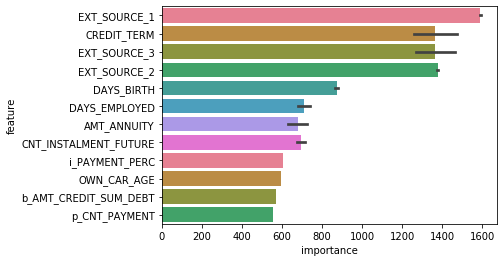

In [39]:
# Plot the most important feautures
sns.set_color_codes("pastel")
sns.barplot(x="importance", y="feature", data=imp,
             palette = (sns.color_palette("husl", 8)))

------


# 6. Submission

In [40]:
test_df['TARGET'] = sub_preds
test_df[['SK_ID_CURR', 'TARGET']].to_csv('submission.csv', index= False)